In [1]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from numpy import *
from scipy.integrate import odeint
%matplotlib inline

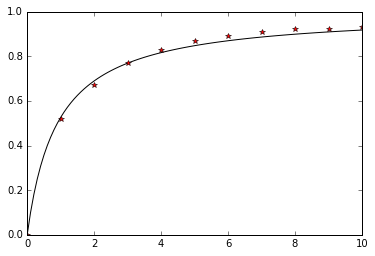

In [25]:
"""Q1"""

CAo = CBo = 1 #mol/l
k = 1.11
Xa = [0,0.52,0.67,0.77,0.83,0.87,0.89,0.91,0.92,0.92,0.93]
V = 1
W = 1*V
def dNdt(z,t):
    Ca, Cb = z
    dNadt = -k*Ca*Cb*W
    dNbdt = -k*Ca*Cb*W
    return (dNadt,dNbdt)

tspan = linspace(0,10,101)
tspan2 = linspace(0,10,11)
N = odeint(dNdt,[CAo,CBo],tspan)
CA = N[:,0]
XA = (CAo - CA)/CAo
plt.plot(tspan,XA,'-k')
plt.plot(tspan2,Xa,'r*')
plt.show()

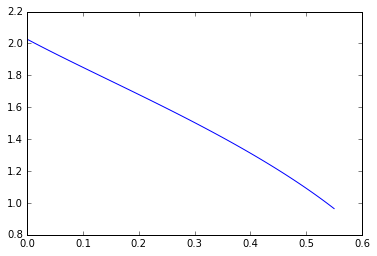

In [40]:
Po = 2*101.325/100
Qo = 20/60 #mol/min
FAo = 1*Qo
FBo = 2*Qo
Ftoto = FAo + FBo
K = 1.85 #bar/kg
k = 1.11 #L2/mol.min.kg
def PBR(z,w):
    Fa,Fb,Fc,P = z
    Ftot = Fa + Fb + Fc
    Q = Po*Qo*Ftot/(P*Ftoto)
    dFadw = -k*(Fa/Q)*(Fb/Q)
    dFbdw = -k*(Fa/Q)*(Fb/Q)
    dFcdw = k*(Fa/Q)*(Fb/Q)
    dPdw  = -K*Po*Ftot/(P*Ftoto)
    return (dFadw,dFbdw,dFcdw,dPdw)

wspan = linspace(0,0.55,101)
ANS = odeint(PBR,[FAo,FBo,0,Po],wspan)
FA = ANS[:,0]
X = (FAo - FA)/FAo
plt.plot(wspan,ANS[:,3])

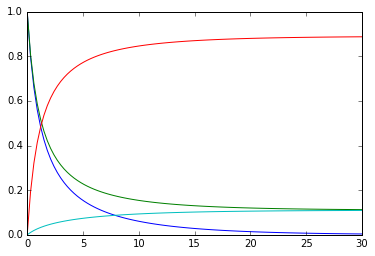

array([ 0.00374614,  0.11283677,  0.88716323,  0.10909063])

In [46]:
"""Q1 b)"""
CAo = CBo = 1 #mol/l
k1 = 0.8
k2 = 0.04
V = 1
W = 1*V
def dNdt(z,t):
    Ca, Cb ,Cc,Cd= z
    dNadt = -k1*Ca*Cb*W - k2*Ca
    dNbdt = -k1*Ca*Cb*W
    dNcdt = k1*Ca*Cb*W
    dNddt = k2*Ca
    return (dNadt,dNbdt,dNcdt,dNddt)

tspan = linspace(0,30,101)

N = odeint(dNdt,[CAo,CBo,0,0],tspan)
CA = N[:,0]
XA = (CAo - CA)/CAo
plt.plot(tspan,N)

plt.show()
N[:,:][-1]

In [ ]:
"""Q2"""